In [187]:
from collections import Counter
import os
import matplotlib.pyplot as plt
import pickle
import xml.etree.cElementTree as ET
import re
from bs4 import BeautifulSoup
import spacy
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
from nltk import word_tokenize
import string
import pymorphy2
import bs4
import collections
import re
import requests
morph = pymorphy2.MorphAnalyzer()
extended_punctuation = string.punctuation + '—»«...--"''" '
from stop_words import get_stop_words
stoplist = get_stop_words('ru') + ['сей', 'свой', 'едва', 'самый', 'го', 'час', 'часы', 'ть', 'минута', 'метр'] + ['com', 'id']

In [ ]:
import collections
papers_for_years1 = collections.defaultdict(list)
tree1 = ET.parse('1921sosn.xhtml')
root1 = tree.getroot()
for meta in root1.iter('meta'):
                if meta.attrib['name'] == 'created' or meta.attrib['name'] == 'date':
                    print(meta.attrib['content'])
                    papers_for_years1[meta.attrib['content']].append(root1.find('body').text)
papers_for_years1['1921']

In [2]:
# def preprocess_text(some_text):
#     some_text = re.sub(r'\[|\]|([0-9])|[a-zA-ZàâäôéèëêïîçùûüÿæœÀÂÄÔÉÈËÊÏÎŸÇÙÛÜÆŒ]', '', str(some_text))
#     lemmatized_text = [morph.parse(word)[0].normal_form for word in word_tokenize(some_text.lower()) if
#                        morph.parse(word)[0].normal_form not in stoplist and extended_punctuation]
#     return lemmatized_text

In [ ]:
paper_corpus_lemmatized = {}
for diaries, year in zip(diaries_for_years_text.values(), range(1928, 1954)):
    years_diaries_dic[year] = [preprocess_text(diarie) for diarie in diaries]
    print(year)

In [ ]:
papers_for_years = collections.defaultdict(list)#создаю словарь, куда можно добавалять много значений по одному ключу
for file_root, dirs, files in os.walk(r'C:\Users\kryuk\Desktop\учеба\asya'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            print(file)
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'): 
                if tag.attrib['name'] == 'created' or tag.attrib['name'] == 'date': 
                    text = '\n'.join([child.text for child in list(root[1]) if child.text])
                    papers_for_years[int(re.search(r'\d{4}', tag.attrib['content'])[0])].append(text) 

In [ ]:
# for year in range(1921, 1925):
#     if year in papers_for_years:
#         print(year, '\n', papers_for_years[year])

In [ ]:
papers_for_years1 = {year: [preprocess_text(note) for note in paper] for year, paper in paper_corpus_without_punct.items()
                     if year in range(1928, 1954)}

In [ ]:
# import pickle
# with open('paper_corpus_without_punct.pickle', 'wb') as fw:
#     pickle.dump(papers_for_years1, fw, protocol=2)

In [5]:
with open('paper_corpus_lemmatized.pickle', 'rb') as f:
    paper_corpus_lemmatized = pickle.load(f)

In [6]:
with open('paper_corpus_without_punct.pickle', 'rb') as f:
    paper_corpus_without_punct = pickle.load(f)

In [8]:
paper_corpus_without_punct_1928 = [[word for word in paper if word not in extended_punctuation] for paper in paper_corpus_without_punct[1928]]

In [27]:
papers_for_years_without_punkt = {year: [[word for word in paper if word not in extended_punctuation] for paper 
                                 in papers] for year, papers in paper_corpus_without_punct.items()}

In [154]:
len(flat_dict_papers[1928])
flat_dict_papers = {year: [note for paper in papers for note in paper] for year, papers in papers_for_years_without_punkt.items()}
# flat_list = [item for sublist in l for item in sublist]
# for sublist in l:
#     for item in sublist:
#         flat_list.append(item)

In [156]:
flat_dict_papers[1930]

['номер',
 'девочка',
 'майк',
 'маленький',
 'девочка',
 'рассказывать',
 'выйти',
 'гулять',
 'весна',
 'потерять',
 'шапка',
 'пальто',
 'потеряться',
 'большой',
 'картинка',
 'журнал',
 'конь',
 'скакать',
 'прыгать',
 'ходить',
 'задний',
 'нога',
 'стоить',
 'военный',
 'бич',
 'конь',
 'красноармеец',
 'полушубок',
 'давать',
 'рассказ',
 'конный',
 'учение',
 'идти',
 'весёлый',
 'рассказ',
 'ёж',
 'стих',
 'печка',
 'загадка',
 'обложка',
 'нарисовать',
 'боец',
 'красный',
 'армия',
 'кавалерист',
 'верхом',
 'конь',
 'лётчик',
 'самолёт',
 'военный',
 'моряк',
 'артиллерист',
 'пушка',
 'телефонист',
 'телефон',
 'красноармеец-пехотинец',
 'боевой',
 'вооружение',
 'февраль',
 'праздновать',
 'годовщина',
 'великий',
 'красный',
 'армия',
 'следующий',
 'номер',
 'чиж',
 'прочесть',
 'рассказ',
 'писатель',
 'художник',
 'рассказ',
 'пёстрый',
 'бычок',
 'увидеть',
 'большой',
 'картинка',
 'детский',
 'дом',
 'берггольц',
 'ольга',
 'зима-лето',
 'попугай',
 'жить-быть',
 

In [72]:
flat_prozhito = {year: ' '.join([' '.join(diary) for diary in diaries]) for year, diaries in years_diaries_clean_dic.items()}

In [82]:
flat_prozhito_without_punkt = {year: ''.join([letter for letter in string if letter not in extended_punctuation]) 
                               for year, string in years_diaries_clean_dic.items()}

In [83]:
len(flat_prozhito_without_punkt[1930])

2489414

In [5]:
paper_corpus_without_punct.keys()

dict_keys([1928, 1929, 1934, 1931, 1930, 1941, 1947, 1943, 1942, 1944, 1945, 1937, 1936, 1950, 1938, 1939, 1949, 1951, 1952, 1935])

In [ ]:
# papers_for_years_lemma[1928]

In [88]:
len(paper_corpus_lemmatized[1935])

1

In [85]:
def get_topics(model, feature_names, no_top_words):
    '''
    берет модель топик-моделинга, слова и количество топиков, возврашает темы
    '''
    with open('topic_paper_for_1935.txt', 'w', encoding='utf-8') as f:
        for topic_idx, topic in enumerate(model.components_):
            print(f"Тема {topic_idx+1}:", file=f)
            topic_words = ", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]])
            print(topic_words, file=f)

In [86]:
def main():
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=5, ngram_range=(2, 2), stop_words=stoplist)
    tfidf = tfidf_vectorizer.fit_transform(paper_corpus_lemmatized[1935])
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    nmf = NMF(n_components=10, random_state=42, alpha=.1, l1_ratio=.5, init='nndsvd', max_iter=100000).fit(tfidf)
    get_topics(nmf, tfidf_feature_names, 10)

In [87]:
if __name__ == '__main__':
    main()#nndsvd

ValueError: max_df corresponds to < documents than min_df

In [1]:
import nltk
from nltk.collocations import *

In [2]:
class Collocator:

    def __init__(self, words: list):
        self.words = words

    def make_collocs(self, number=10) -> list:
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        trigram_measures = nltk.collocations.TrigramAssocMeasures()
        finder = BigramCollocationFinder.from_words(self.words)
        return finder.nbest(bigram_measures.pmi, number)

In [ ]:
colloc = Collocator(['мама', 'мыть', 'рама', 'мыть', )

In [23]:
#ключевые слова по degree centrality
import networkx as nx
def get_keywords_graph_degree_centrality(text, num_keywords):
    """
    берет текст в виде списка слов и количество ключевых слов для извлечения,
    возвращает в качестве ключевых слов узлы графа с самой высокой степенью degree centrality
    """
    G = nx.Graph()
    G.add_edges_from([(text[i], text[i+1]) for i, item in enumerate(text) if i != (len(text)-1)])
    dc = nx.degree_centrality(G)
    keywords = [node for node in sorted(dc, key=dc.get, reverse=True)[:num_keywords]]
    return keywords

In [ ]:
def get_keywords_bigrams_tf_idf(texts, num_keywords):
    """
    берет список не лемматизированных текстов в виде строк
    и количество ключевых слов для извлечения,
    возвращает в качестве ключевых слов слова и биграммы, 
    отобранные методом TF-IDF
    """
    keywords = []
    make_tf_idf = TfidfVectorizer(stop_words=rus_stop_words, ngram_range=(1, 2))
    texts_as_tfidf_vectors = make_tf_idf.fit_transform(get_preprocessed_text(text) for text in texts)
    id2word = {i : word for i, word in enumerate(make_tf_idf.get_feature_names())} 
    for text_row in range(texts_as_tfidf_vectors.shape[0]): 
        row_data = texts_as_tfidf_vectors.getrow(text_row) 
        words_for_this_text = row_data.toarray().argsort() 
        top_words_for_this_text = words_for_this_text [0, : -(num_keywords + 1) : -1] 
        keywords_for_this_text = [id2word[w] for w in top_words_for_this_text]
        keywords.append(keywords_for_this_text)
    return keywords

In [ ]:
for text_keywords in get_keywords_bigrams_tf_idf(texts, 10):
    print(text_keywords)

In [31]:
for text in flat_dict_papers.values():
    print(get_keywords_graph_degree_centrality(text, 10))

['работа', 'приёмник', 'должный', 'катушка', 'схема', 'радио', 'конденсатор', 'большой', 'радиолюбитель', 'вопрос']
['работа', 'должный', 'приёмник', 'станция', 'организация', 'одр', 'большой', 'волна', 'вопрос', 'ток']
['работа', 'новый', 'большой', 'говорить', 'колхоз', 'хороший', 'рабочий', 'должный', 'дело', 'поп']
['работа', 'колхоз', 'рабочий', 'бригада', 'должный', 'строительство', 'организация', 'район', 'борьба', 'совхоз']
['рабочий', 'работа', 'новый', 'партия', 'страна', 'борьба', 'говорить', 'дело', 'должный', 'вопрос']
['противник', 'район', 'часть', 'армия', 'фронт', 'сд', 'танк', 'бой', 'рубеж', 'направление']
['советский', 'достоевский', 'страна', 'народ', 'новый', 'работа', 'великий', 'партия', 'трудящийся', 'ленин']
['противник', 'должный', 'войско', 'группа', 'церковь', 'армия', 'часть', 'враг', 'народ', 'танк']
['противник', 'цель', 'истребитель', 'самолёт', 'группа', 'бой', 'штурмовик', 'авиация', 'должный', 'действие']
['церковь', 'русский', 'патриарх', 'г.', 'нар

In [30]:
for year in sorted(flat_dict_papers.keys())[:10]:
    colloc = Collocator(flat_dict_papers[year])
    print(year, colloc.make_collocs())

1928 [('-милляметров', 'трехслойный'), ('-пудовый', 'поклажа'), ('а-б', 'в-г'), ('а.н', 'фрункина'), ('абрам', 'гришанин'), ('абхазец', 'грузин'), ('авиац.', 'спецгазомёт'), ('австриец', 'датчанин'), ('авто-мото-клуб', 'спорт-клуб'), ('автобус', 'обгонять')]
1929 [('-ваттной', 'затевать'), ('-работник', 'телевоксами'), ('-ский', 'радиополка'), ('-ским', 'радиополок'), ('.и', 'денисов'), ('а.г', 'горнфельд'), ('а.и', 'рабинович'), ('а.р', 'орбинский'), ('а.я', 'мангушевский'), ('аахен', 'данциг')]
1930 [('.......', 'извинить'), ('.наречие', '.река'), ('.отрицание', '.город'), ('.часть', 'экипаж'), ('агея', 'филипп'), ('агитировать', 'показ'), ('аккуратист', 'отрекомендовать'), ('аксельрод', 'ткаченко'), ('акулов', 'наложение'), ('альфа', 'омега')]
1931 [('-летний', 'юбилей'), ('аббот', 'дева'), ('аболин', 'евреинов'), ('абралинский', 'каркаралинский'), ('австрия', 'швейцария'), ('автомобиль', 'спа'), ('агрегат', 'впервые'), ('агроминимум', 'скверный'), ('агросовещание', 'снегозадержание

In [ ]:
colloc.words

In [52]:
len(flat_dict_papers[1930])

51789

In [69]:
# word_fd = nltk.FreqDist(flat_dict_papers[1930])
bigram_fd = nltk.FreqDist(nltk.bigrams(flat_dict_papers[1930]))
# tokens = nltk.wordpunct_tokenize(text)
finder = BigramCollocationFinder(word_fd, bigram_fd)
# sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

In [60]:
len(flat_prozhito[1930])

2489414

In [77]:
type(flat_prozhito[1930])

str

In [ ]:
out = stringIn.translate(stringIn.maketrans("",""), string.punctuation) 

In [134]:
def collocater(text):
    tokens = nltk.wordpunct_tokenize(text)
    tokens_without_punkt = [token for token in tokens if token not in extended_punctuation and stoplist]
    word_prozhito = nltk.FreqDist(tokens_without_punkt)
    bigram_prozhito = nltk.FreqDist(nltk.bigrams(tokens_without_punkt))
    finder_prozhito = BigramCollocationFinder(word_prozhito, bigram_prozhito)
    finder_prozhito.apply_word_filter(lambda w: len(w) < 3 or w.lower() in stoplist)
    finder_prozhito = sorted(finder_prozhito.ngram_fd.items(), key=lambda t: (-t[1], t[0]))
    return finder_prozhito

In [ ]:
flat_prozhito_without_punkt[1930]

In [160]:
colloc_for_years_all = []
for key, value in flat_prozhito_without_punkt.items():
    colloc_for_years.append('\n' + str(key) + '\n')
    colloc_for_years.append(collocater(flat_prozhito_without_punkt[key]))
# with open('colloc_for_years_prozhito50.txt', 'w', encoding='utf-8') as f:
#     print(*colloc_for_years, file=f)

In [118]:
sorted(finder_prozhito.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:30]

[(('лечь', 'спать'), 90),
 (('утром', 'ходить'), 87),
 (('клодить', 'ходить'), 81),
 (('оружейный', 'палата'), 76),
 (('друг', 'друг'), 74),
 (('попить', 'чай'), 73),
 (('охотный', 'ряд'), 72),
 (('пить', 'чаять'), 68),
 (('рубль', 'копа'), 55),
 (('воскресение', 'утром'), 51),
 (('мюр', 'купить'), 51),
 (('главное', 'образ'), 49),
 (('конец', 'конец'), 49),
 (('вечером', 'ходить'), 44),
 (('утром', 'встать'), 43),
 (('послать', 'домой'), 42),
 (('приехать', 'домой'), 42),
 (('ряд', 'купить'), 42),
 (('академия', 'наука'), 41),
 (('минут', 'минут'), 41),
 (('получить', 'письмо'), 41),
 (('пришлый', 'домой'), 41),
 (('письмо', 'васа'), 40),
 (('базар', 'купить'), 39),
 (('писать', 'дневник'), 39),
 (('исторический', 'музей'), 37),
 (('работать', 'мастерский'), 37),
 (('поехать', 'домой'), 36),
 (('точка', 'зрение'), 36),
 (('вернуться', 'домой'), 35)]

In [58]:
flat_prozhito[1930][1]

'н'

In [47]:
with open('years_diaries_clean_dic.pickle', 'rb') as f:
    years_diaries_clean_dic = pickle.load(f)

In [43]:
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:10]

[(('советский', 'союз'), 79),
 (('рабочий', 'класс'), 76),
 (('сельский', 'хозяйство'), 68),
 (('социалистический', 'строительство'), 41),
 (('красный', 'армия'), 37),
 (('советский', 'власть'), 37),
 (('город', 'деревня'), 32),
 (('декабрь', 'тасс'), 30),
 (('пятилетний', 'план'), 29),
 (('капиталистический', 'страна'), 28)]

In [ ]:
colloc.make_collocs()

In [158]:
#1942 - всего 3 записи, не делает моделирование, 1935 тоже - 1
len(flat_dict_papers)

20

In [35]:
for year, papers in flat_dict_papers.items():
    with open(f'Newspaper_for_{year}.txt', 'w', encoding='utf-8') as f:
        print(*papers, file=f)

In [159]:
colloc_for_years_papers_all = []
for key, value in flat_dict_papers.items():
    colloc_for_years_papers.append('\n' + str(key) + '\n')
    colloc_for_years_papers.append(collocater(' '.join(flat_dict_papers[key]), 50))
with open('colloc_for_years_papers50.txt', 'w', encoding='utf-8') as f:
    print(*colloc_for_years_papers, file=f)

In [189]:
type(flat_dict_papers[1928][1])

str

In [208]:
authors_nkrya = []
date = None
author_nkrya = None
for file_root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'):
                if tag.attrib['name'] in {'date', 'publ_year', 'created'}:
                    year = re.search(r'\d{4}', tag.attrib['content'])
                    if year:
                        if int(year[0]) in range(1928, 1954):
                            date = int(year[0])
                elif tag.attrib['name'] == 'author':
                    author_nkrya = tag.attrib['content']
            if date and author_nkrya:
                authors_nkrya.append(author_nkrya)
            date = None
            author_nkrya = None

In [165]:
sorted(dict(Counter(authors_nkrya)).items(), key=lambda x: x[1], reverse=True)

[('неизвестный', 1056),
 ('обобщенный', 527),
 ('коллективный', 189),
 ('И.В. Сталин', 18),
 ('Сергий (Страгородский) Патриарх Московский и всея Руси', 15),
 ('(Симанский), Патриарх Московский и всея Руси Алексий', 14),
 ('Асеев Б.', 11),
 ('Попов А.', 10),
 ('Бронштейн С.', 10),
 ('Сталин И.В.', 10),
 ('Г. Александров', 9),
 ('Николай (Ярушевич) Митрополит Крутицкий и Коломенский', 8),
 ('А. Шаповалова', 8),
 ('Т. Пречистенский', 8),
 ('В. Гранов|А. Рохович', 8),
 ('Боголепов М.', 7),
 ('Менщиков И.', 7),
 ('Алексий (Симанский) Патриарх Московский и всея Руси', 6),
 ('(Ярушевич), Митрополит Крутицкий и Коломенский Николай', 6),
 ('Изюмов Н.', 6),
 ('Алексий (Симанский) Митрополит Ленинградский и Новгородский', 5),
 ('Т. М. Богословский', 5),
 ('Красовский Е.', 5),
 ('Кин С.', 5),
 ('М.И. Калинин|А.Ф. Горкин', 5),
 ('Дженкинс', 4),
 ('Братин', 4),
 ('Александр Смирнов', 4),
 ('Н. Васильева', 4),
 ('А.М.', 4),
 ('Неизвестен', 4),
 ('Гинзбург З.', 4),
 ('Ляпичев Ф.', 4),
 ('В.К. Эрманс',

In [394]:
bigram = 'китай'
bigram_for_years_prozhito = {}
for key, value in flat_prozhito_without_punkt.items():
    bigram_for_years_prozhito[key] = flat_prozhito_without_punkt[key].count(bigram)
print(bigram_for_years_prozhito)

{1928: 42, 1929: 80, 1930: 43, 1931: 155, 1932: 476, 1933: 203, 1934: 100, 1935: 41, 1936: 29, 1937: 98, 1938: 78, 1939: 51, 1940: 38, 1941: 65, 1942: 271, 1943: 244, 1944: 415, 1945: 446, 1946: 15, 1947: 13, 1948: 35, 1949: 18, 1950: 27, 1951: 67, 1952: 20, 1953: 8}


In [395]:
sum(list(bigram_for_years_prozhito.values()))

3078

In [396]:
bigram_for_years_nkrya = {}
for key, value in sorted(flat_dict_papers.items()):
    bigram_for_years_nkrya[key] = ' '.join(flat_dict_papers[key]).count(bigram)
print(bigram_for_years_nkrya)

{1928: 7, 1929: 20, 1930: 40, 1931: 15, 1934: 12, 1935: 0, 1936: 1, 1937: 98, 1938: 25, 1939: 23, 1941: 11, 1942: 0, 1943: 0, 1944: 0, 1945: 40, 1947: 1, 1949: 1, 1950: 12, 1951: 17, 1952: 38}


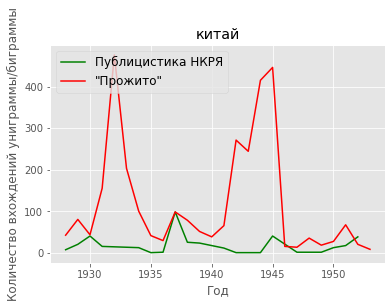

<Figure size 432x288 with 0 Axes>

In [397]:
from matplotlib import style  # добавляем стили
style.use('ggplot')  # выбираем стиль ggplot

plt.plot(list(bigram_for_years_nkrya.keys()), list(bigram_for_years_nkrya.values()), 'g',label='Публицистика НКРЯ')
plt.plot(list(bigram_for_years_prozhito.keys()), list(bigram_for_years_prozhito.values()), 'r',label='"Прожито"')

plt.title(bigram)
plt.ylabel('Количество вхождений униграммы/биграммы')
plt.xlabel('Год')
plt.legend(fontsize=12)

plt.show()
plt.savefig('испания.pdf')

In [ ]:
all_topics = []
for file_root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'):
                if tag.attrib['name'] in {'date', 'publ_year', 'created'}:
                    year = re.search(r'\d{4}', tag.attrib['content'])
                    if year:
                        if int(year[0]) in range(1928, 1954):
                            date = int(year[0])
                elif tag.attrib['name'] == 'topic':
                    topic = tag.attrib['content']
            if date and topic:
                all_topics.append(topic)
            date = None
            topic = None
sorted(dict(Counter(all_topics)).items(), key=lambda x: x[1], reverse=True)

In [ ]:
publ_places = []
for file_root, dirs, files in os.walk('.'):
    for file in files:
        if file.endswith('.xhtml') or file.endswith('.xml'):
            tree = ET.parse(os.path.join(file_root, file))
            root = tree.getroot()
            for tag in root.iter('meta'):
                if tag.attrib['name'] in {'date', 'publ_year', 'created'}:
                    year = re.search(r'\d{4}', tag.attrib['content'])
                    if year:
                        if int(year[0]) in range(1928, 1954):
                            date = int(year[0])
                elif tag.attrib['name'] == 'publication':
                    publ_place = tag.attrib['content']
            if date and publ_place:
                publ_places.append(publ_place)
            date = None
            publ_place = None
sorted(dict(Counter(publ_places)).items(), key=lambda x: x[1], reverse=True)